# FASHION MNIST CLASSIFICATION

### Summary:
Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes.

The 10 classes are as follows:

0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

POINTS: 
Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)

Acknowledgements:
Original dataset was downloaded from https://github.com/zalandoresearch/fashion-mnist

Dataset was converted to CSV with this script: https://pjreddie.com/projects/mnist-in-csv/


### STEP1: Importing libraries and dataset

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import random

import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
%matplotlib inline

C:\Users\nitishg\AppData\Roaming\Python\Python37\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
Using TensorFlow backend.


### STEP2: Load Data

In [2]:
# dataframes creation for both training and testing datasets (Point your dataset path here)
dataset_train = pd.read_csv('../DATASET/fashion-mnist/input/fashion-mnist_train.csv',sep=',')
dataset_test = pd.read_csv('../DATASET/fashion-mnist/input/fashion-mnist_test.csv', sep = ',')

### STEP3 : Pre-Processing

In [3]:
#Define variables with 
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

#Train data
x = np.array(dataset_train.iloc[:, 1:])
# Now we one hot encode outputs
y = to_categorical(np.array(dataset_train.iloc[:, 0]))

#Here we split validation data to optimiza classifier during training
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=13)

#Test data
x_test = np.array(dataset_test.iloc[:, 1:])
# Now we one hot encode outputs
y_test = to_categorical(np.array(dataset_test.iloc[:, 0]))

# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (48000,28,28) to (48000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255
x_val /= 255

# Print the variables to know your data
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('x_val shape:', x_val.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))
print()

# printing the number of samples in x_train, x_test, y_train, y_test
print("Initial shape or dimensions of x_train", str(x_train.shape))
print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))
print()
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print()
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))



x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_val shape: (12000, 28, 28, 1)
48000 train samples
10000 test samples
Number of Classes: 10

Initial shape or dimensions of x_train (48000, 28, 28, 1)
Number of samples in our training data: 48000
Number of labels in our training data: 48000
Number of samples in our test data: 10000
Number of labels in our test data: 10000

Dimensions of x_train:(28, 28, 1)
Labels in x_train:(48000, 10)

Dimensions of x_test:(28, 28, 1)
Labels in y_test:(10000, 10)


### STEP4: Create the Model

In [4]:
# Training Parameters
batch_size = 256
num_classes = 10
epochs = 30

#input image dimensions
img_rows, img_cols = 28, 28

# create model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

# summary of Model
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
________________________________________________

### STEP5: Train the Model

In [5]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val))
score = model.evaluate(x_test, y_test, verbose=0)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 44s 907us/step - loss: 0.8854 - accuracy: 0.6672 - val_loss: 0.5339 - val_accuracy: 0.7980
Epoch 2/30
48000/48000 [==============================] - 40s 833us/step - loss: 0.5293 - accuracy: 0.8019 - val_loss: 0.4332 - val_accuracy: 0.8364
Epoch 3/30
48000/48000 [==============================] - 41s 850us/step - loss: 0.4537 - accuracy: 0.8328 - val_loss: 0.3764 - val_accuracy: 0.8627
Epoch 4/30
48000/48000 [==============================] - 43s 899us/step - loss: 0.4132 - accuracy: 0.8477 - val_loss: 0.3472 - val_accuracy: 0.8727
Epoch 5/30
48000/48000 [==============================] - 40s 839us/step - loss: 0.3835 - accuracy: 0.8604 - val_loss: 0.3417 - val_accuracy: 0.8724
Epoch 6/30
48000/48000 [==============================] - 42s 873us/step - loss: 0.3620 - accuracy: 0.8683 - val_loss: 0.3135 - val_accuracy: 0.8861
Epoch 7/

### STEP6: Evaluate the model

In [6]:
# Print total Loss and accuracy of model
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2143545884013176
Test accuracy: 0.9190999865531921


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


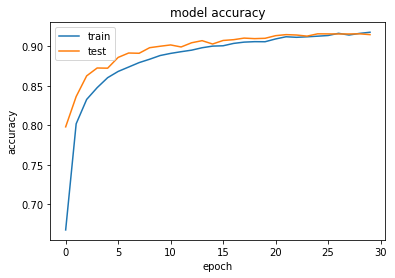

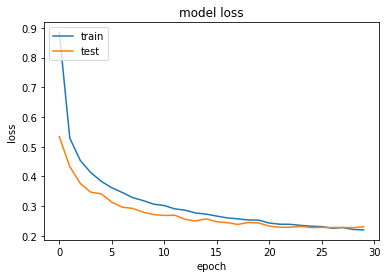

In [7]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
# get the predictions for the test data
predicted_classes = model.predict_classes(x_test)

# get the indices to be plotted
y_true = dataset_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

'''  
# get the predictions for the test data
predicted_classes = model.predict_classes(x_test)
print(classification_report(np.argmax(y_test,axis=1), predicted_classes))
print(confusion_matrix(np.argmax(y_test,axis=1), predicted_classes))
'''

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


'  \n# get the predictions for the test data\npredicted_classes = model.predict_classes(x_test)\nprint(classification_report(np.argmax(y_test,axis=1), predicted_classes))\nprint(confusion_matrix(np.argmax(y_test,axis=1), predicted_classes))\n'

              precision    recall  f1-score   support

     Class 0       0.85      0.88      0.87      1000
     Class 1       0.98      0.99      0.99      1000
     Class 2       0.84      0.90      0.87      1000
     Class 3       0.93      0.93      0.93      1000
     Class 4       0.89      0.87      0.88      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.79      0.71      0.75      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



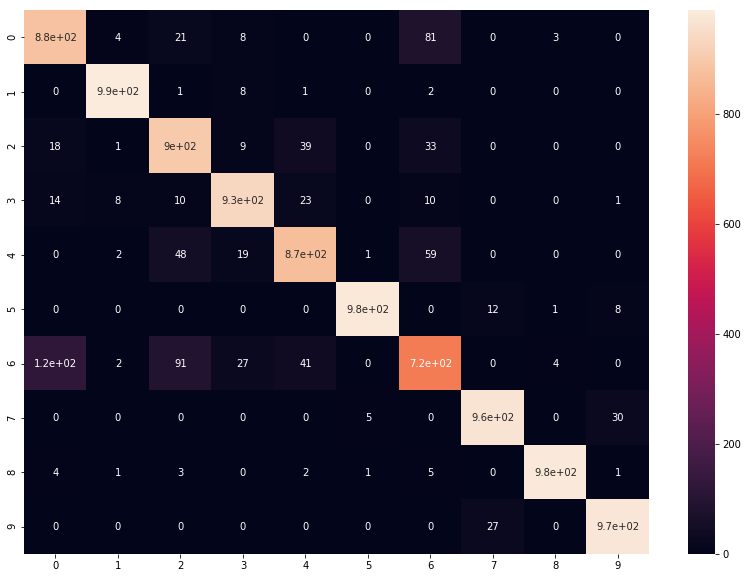

In [9]:
target_names = ["Class {}".format(i) for i in range(num_classes)]

# Print the classification Report
print(classification_report(y_true, predicted_classes, target_names=target_names))

# Plot confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

### STEP6(a) Displaying our classified data

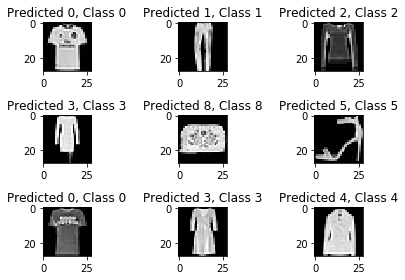

In [10]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

### STEP6(b) Displaying our misclassified data

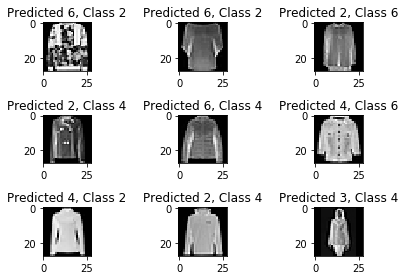

In [11]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()